<a href="https://colab.research.google.com/github/devcodes9/BitcoinPredictionProject/blob/main/BitcoinProjectAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Bitcoin data(past 30 days) from CoinGeckoAPI

In [ ]:
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id = "bitcoin",vs_currency= "inr",days = "30")

#Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
df = pd.DataFrame(bitcoin_data["prices"],columns = ["Timestamp","Price"])
df["Date"] = pd.to_datetime(df["Timestamp"], unit = 'ms')
df

,Timestamp,Price,Date
0,1626022862112,2.539668e+06,2021-07-11 17:01:02.112
1,1626026421678,2.533468e+06,2021-07-11 18:00:21.678
2,1626030072591,2.536803e+06,2021-07-11 19:01:12.591
3,1626033654526,2.529985e+06,2021-07-11 20:00:54.526
4,1626037294600,2.529400e+06,2021-07-11 21:01:34.600
...,...,...,...
718,1628600412328,3.407034e+06,2021-08-10 13:00:12.328
719,1628604082952,3.383548e+06,2021-08-10 14:01:22.952
720,1628607640651,3.375805e+06,2021-08-10 15:00:40.651
721,1628611226223,3.364637e+06,2021-08-10 16:00:26.223


#Grouping Data

In [ ]:
candlestick_data = df.groupby(df.Date.dt.date).agg({"Price":['min','max','first','last']})
candlestick_data

Price                                          
                     min           max         first          last
Date                                                              
2021-07-11  2.529400e+06  2.577341e+06  2.539668e+06  2.567270e+06
2021-07-12  2.450420e+06  2.577026e+06  2.554899e+06  2.471280e+06
2021-07-13  2.419705e+06  2.482480e+06  2.479322e+06  2.431828e+06
2021-07-14  2.376884e+06  2.464510e+06  2.443513e+06  2.464510e+06
2021-07-15  2.338864e+06  2.466474e+06  2.448440e+06  2.374443e+06
2021-07-16  2.325825e+06  2.401963e+06  2.362224e+06  2.358533e+06
2021-07-17  2.338991e+06  2.386197e+06  2.343771e+06  2.366153e+06
2021-07-18  2.333125e+06  2.406093e+06  2.357494e+06  2.358342e+06
2021-07-19  2.298496e+06  2.388071e+06  2.381073e+06  2.322268e+06
2021-07-20  2.205992e+06  2.322933e+06  2.319419e+06  2.205992e+06
2021-07-21  2.211698e+06  2.403132e+06  2.229604e+06  2.390953e+06
2021-07-22  2.377489e+06  2.423521e+06  2.405444e+06  2.402687e+06
2021-07-23  2.396214e+06  2.484193e+06  2.411688e+06  2.484193e+06
2021-07-24  2.495439e+06  2.565230e+06  2.495439e+06  2.535238e+06
2021-07-25  2.529933e+06  2.586907e+06  2.553179e+06  2.577219e+06
2021-07-26  2.644956e+06  2.961192e+06  2.644956e+06  2.779453e+06
2021-07-27  2.716812e+06  2.927069e+06  2.765559e+06  2.927069e+06
2021-07-28  2.865183e+06  3.039393e+06  2.912984e+06  2.959642e+06
2021-07-29  2.931296e+06  3.016866e+06  2.977930e+06  2.957892e+06
2021-07-30  2.878809e+06  3.107590e+06  2.968223e+06  3.072951e+06
2021-07-31  3.063857e+06  3.121315e+06  3.119190e+06  3.114572e+06
2021-08-01  2.997438e+06  3.170678e+06  3.101582e+06  2.997438e+06
2021-08-02  2.889140e+06  3.018848e+06  2.974071e+06  2.933243e+06
2021-08-03  2.826450e+06  2.956045e+06  2.919676e+06  2.850449e+06
2021-08-04  2.800154e+06  2.957972e+06  2.833199e+06  2.942379e+06
2021-08-05  2.787305e+06  3.033406e+06  2.950018e+06  3.030635e+06
2021-08-06  2.954334e+06  3.200482e+06  3.023101e+06  3.167692e+06
2021-08-07  3.178543e+06  3.275139e+06  3.178543e+06  3.263714e+06
2021-08-08  3.245381e+06  3.351167e+06  3.303451e+06  3.298449e+06
2021-08-09  3.207229e+06  3.456671e+06  3.259249e+06  3.440933e+06
2021-08-10  3.361388e+06  3.448616e+06  3.448616e+06  3.361388e+06

#Candlestick Graph

In [ ]:
fig = go.Figure(data=[go.Candlestick(x= candlestick_data.index,
                open=candlestick_data['Price']['first'],
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'],
                close=candlestick_data['Price']['last'])])

fig.update_layout(xaxis_title = "Date",yaxis_title="Price(INR)",title = "BITCOIN CANDLESTICK CHART OVER PAST 30 DAYS")


fig.show()


#Visualizing Data

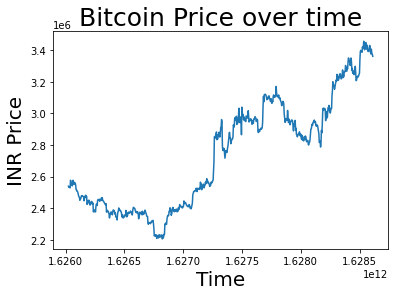

In [ ]:
plt.plot(df["Timestamp"],df["Price"])
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("INR Price", size=20)
plt.show()

#Data Preprocessing

In [ ]:
df.groupby(df.Date.dt.date).agg({"Price":['min','max','first','last']}).reset_index().to_csv('candlestick_data.csv')
data = pd.read_csv("candlestick_data.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
data.drop(labels=0, axis=0,inplace = True)
data.rename(columns= {'Price':'min','Price.1':'max','Price.2':'first','Price.3':'last'})


,Date,min,max,first,last
1,2021-07-11,2529399.980395044,2577340.5311838095,2539668.3310001097,2567269.606779768
2,2021-07-12,2450419.563641706,2577025.935604856,2554899.299722558,2471279.9526514392
3,2021-07-13,2419705.4339503534,2482480.4279240947,2479321.773220109,2431828.032303076
4,2021-07-14,2376884.3494762843,2464510.418891882,2443513.348937644,2464510.418891882
5,2021-07-15,2338864.4474720014,2466474.0937076234,2448440.4991061375,2374443.1958935303
6,2021-07-16,2325825.214673709,2401963.3663749355,2362224.393214125,2358533.407035554
7,2021-07-17,2338990.9584086286,2386196.511552602,2343770.606656084,2366152.603130841
8,2021-07-18,2333125.424207806,2406092.7862069057,2357494.131597727,2358342.0089921574
9,2021-07-19,2298496.4856761973,2388070.804324445,2381072.993983235,2322268.385549079
10,2021-07-20,2205991.591657621,2322932.6646075826,2319419.251592374,2205991.591657621


In [ ]:
x = data.iloc[:,1:4]
y = data.iloc[:,-1]

# Splitting the data 

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state = 0,test_size = 0.20)

# Fitting Data

In [ ]:
alg = LinearRegression()
alg.fit(x_train,y_train)
y_pred = alg.predict(x_test)
y_pred

array([2440347.71877484, 3368461.60125782, 2554805.99358807,
       2342643.25502977, 3262727.06395124, 2880771.96701016,
       2946308.40952975])

#Coefficient of determination(Score)

In [ ]:
alg.score(x_test,y_test)

0.9706134665345598

# Visualizing Predictions

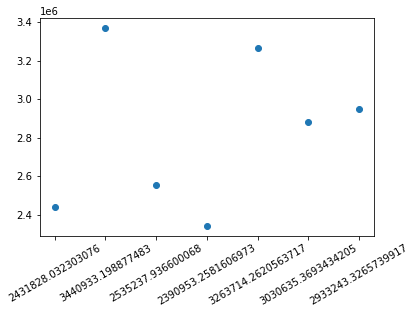

In [ ]:
plt.scatter(y_test,y_pred)
plt.tick_params(axis='x', rotation = 30)

# Evaluating Model

In [ ]:

mse = mean_squared_error(y_test,y_pred)
print("Mean Square Error: ",mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error: ",rmse)
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2*100,"%")

Mean Square Error:  4381741869.651401
Root Mean Square Error:  66194.72690215892
R2 Score :  97.06134665345598 %


# Custom Prediction

In [ ]:
alg.predict([[3361388.4683256093,	3448616.092574294,	3448616.092574294	]])


array([3392230.23588212])